<a href="https://colab.research.google.com/github/Talha1818/Machine-Learning-Python-Notebooks/blob/master/Stamp_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyPDF4~=1.27.0
!pip install pdf2image~=1.16.0
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt-get install poppler-utils
#!pip install paddleocr
#!pip install paddlepaddle paddleocr
#!pip install Pillow==9.0.0 --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [2]:
import csv
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
from PyPDF4.pdf import BytesIO
import os
import pandas as pd
from tqdm.auto import tqdm
from IPython.display import clear_output 
import io
import pandas as pd


In [3]:
df = pd.read_csv("217932_PA_PHILADELPHIA_meaning.csv")

In [4]:
df.head()

,Unnamed: 0,page#,package_name,label,probability,cpu_usage (seconds),ram_usage (MB),Meaning
0,0,1,217932_PA_PHILADELPHIA.pdf,28,0.999456,4.67,0.000000,LENDER NOTE
1,1,2,217932_PA_PHILADELPHIA.pdf,28,0.999384,4.71,-42.467328,LENDER NOTE
2,2,3,217932_PA_PHILADELPHIA.pdf,28,0.999415,4.62,0.000000,LENDER NOTE
3,3,4,217932_PA_PHILADELPHIA.pdf,28,0.999435,4.65,0.000000,LENDER NOTE
4,4,5,217932_PA_PHILADELPHIA.pdf,11,0.998924,4.46,0.000000,ALTA BUYER’S STATEMENT


In [5]:
df['Meaning'].unique()

array(['LENDER NOTE', 'ALTA BUYER’S STATEMENT', 'ALTA SELLER’S STATEMENT',
       'BUYER’S CD', 'SELLER CD', 'AFF OF TITLE', 'DEED COPY',
       'LENDER ALLONGE', 'LENDER MORTGAGE', 'MARKED UP COMMITMENT',
       'LENDER FUNDING WORKSHEET', 'LENDER’S INSTRUCTIONS',
       'LENDER TAX INFO SHEET', 'Loan Application',
       'LENDER BORROWER CONSENT', 'LENDER AFF OF OCCUPANCY',
       'LENDER ESCROW DISCLOSURE STATEMENT (INITIAL ACCOUNT)',
       'LENDER COMPLIANCE AGREEMENT', 'LENDER NAME/SIGNATURE AFFIDAVIT',
       'LENDER PATRIOT FORM', 'LENDER BORROWER’S CERT & AUTH',
       'LENDER CREDIT SCORE DISCLOSURE (EQUIFAX))',
       'LENDER CREDIT SCORE DISCLOSURE (TRANSUNION)',
       'LENDER FLOOD DETERMINATION', 'LENDER AMORTIZATION SCHEDULE',
       'LENDER ECOA NOTICE', 'LENDER CREDIT SCORE DISCLOSURE (EXPERIAN)',
       'LENDER ESCROW DISCLOSURE STATEMENT (HAZARD REQUIREMENTS)',
       'Hazard Insurance Endorsement Letter'], dtype=object)

In [6]:
df = df[df['Meaning'].isin(['DEED COPY', 'AFF OF TITLE', 'LENDER NAME/SIGNATURE AFFIDAVIT',
                            'LENDER COMPLIANCE AGREEMENT', 'LENDER AFF OF OCCUPANCY',
                            'LENDER MORTGAGE'])]

In [7]:
df['Meaning'].value_counts()

LENDER MORTGAGE                    23
DEED COPY                           5
LENDER AFF OF OCCUPANCY             2
AFF OF TITLE                        1
LENDER COMPLIANCE AGREEMENT         1
LENDER NAME/SIGNATURE AFFIDAVIT     1
Name: Meaning, dtype: int64

In [8]:
df_mort = df[df['Meaning']=='DEED COPY']
df_mort

,Unnamed: 0,page#,package_name,label,probability,cpu_usage (seconds),ram_usage (MB),Meaning
18,18,19,217932_PA_PHILADELPHIA.pdf,2,0.997310,4.53,0.000000,DEED COPY
19,19,20,217932_PA_PHILADELPHIA.pdf,2,0.997592,4.53,0.000000,DEED COPY
20,20,21,217932_PA_PHILADELPHIA.pdf,2,0.996906,4.77,0.245760,DEED COPY
21,21,22,217932_PA_PHILADELPHIA.pdf,2,0.997395,4.61,0.000000,DEED COPY
102,102,103,217932_PA_PHILADELPHIA.pdf,2,0.418897,3.54,205.725696,DEED COPY


In [9]:
pdf_file = "/content/drive/MyDrive/Annotation Folder/Few_Packages/PDF/217932_PA_PHILADELPHIA.pdf"

In [10]:
def get_images_from_file(filename):
    try:
        return convert_from_path(filename, thread_count=8)
    except:
        return []

In [11]:
images = get_images_from_file(pdf_file)

In [12]:
for i, image in tqdm(enumerate(images)):
    image.save(f'page#{i+1}.jpg')

0it [00:00, ?it/s]

In [13]:
pages = [f"page#{i}.jpg"  for i in df['page#'].tolist()]
pages

['page#18.jpg',
 'page#19.jpg',
 'page#20.jpg',
 'page#21.jpg',
 'page#22.jpg',
 'page#24.jpg',
 'page#25.jpg',
 'page#26.jpg',
 'page#27.jpg',
 'page#28.jpg',
 'page#29.jpg',
 'page#30.jpg',
 'page#31.jpg',
 'page#32.jpg',
 'page#33.jpg',
 'page#34.jpg',
 'page#35.jpg',
 'page#36.jpg',
 'page#37.jpg',
 'page#38.jpg',
 'page#39.jpg',
 'page#40.jpg',
 'page#41.jpg',
 'page#42.jpg',
 'page#43.jpg',
 'page#44.jpg',
 'page#45.jpg',
 'page#46.jpg',
 'page#66.jpg',
 'page#67.jpg',
 'page#70.jpg',
 'page#71.jpg',
 'page#103.jpg']

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [17]:
def DETECTION(img_path):
  import cv2
  from google.colab.patches import cv2_imshow

  # Load the image
  img = cv2.imread(img_path)

  height, width, channels = img.shape

  # Define the crop parameters
  x = 0
  y = 400
  h = height - y
  w = width

  # Crop the image
  img = img[y:y+h, x:x+w]

  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply thresholding to create a binary image
  _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  # Find contours in the binary image
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

  # Iterate over each contour and filter out the ones that are not rectangles
  rectangles = []
  for cnt in contours:
      # Approximate the contour with a polygon
      approx = cv2.approxPolyDP(cnt, 0.04 * cv2.arcLength(cnt, True), True)
      
      # Filter out the polygon if it doesn't have four sides
      if len(approx) == 4:
          # Calculate the area of the polygon
          area = cv2.contourArea(approx)
          
          # Filter out the polygon if its area is too small or too large
          if 5000 < area:
              # Filter out the polygon if its width is less than 400 or height is less than 150
              x, y, w, h = cv2.boundingRect(approx)
              if (w > 250 and w < 600) and (h > 100 and h < 500):
                  rectangles.append(approx)

  # Draw the rectangles on the original image
  for rect in rectangles:
      cv2.drawContours(img, [rect], 0, (0, 0, 255), 5)

  total_area = 0

  for rect in rectangles:
      area = cv2.contourArea(rect)
      total_area += area
      
  print(f"Total area of rectangles: {total_area}")

  target_area = total_area
  target_rectangles = []

  for rect in rectangles:
      area = cv2.contourArea(rect)
      if abs(area - target_area) < 100:  # allow for some tolerance in area
          target_rectangles.append(rect)
          
  print(f"Found {len(target_rectangles)} rectangle(s) with area {target_area}")

  cv2_imshow(img)
  # if total_area > 6000.0:
  #   # Display the result
  #   cv2_imshow(img)


In [18]:
pages

['page#18.jpg',
 'page#19.jpg',
 'page#20.jpg',
 'page#21.jpg',
 'page#22.jpg',
 'page#24.jpg',
 'page#25.jpg',
 'page#26.jpg',
 'page#27.jpg',
 'page#28.jpg',
 'page#29.jpg',
 'page#30.jpg',
 'page#31.jpg',
 'page#32.jpg',
 'page#33.jpg',
 'page#34.jpg',
 'page#35.jpg',
 'page#36.jpg',
 'page#37.jpg',
 'page#38.jpg',
 'page#39.jpg',
 'page#40.jpg',
 'page#41.jpg',
 'page#42.jpg',
 'page#43.jpg',
 'page#44.jpg',
 'page#45.jpg',
 'page#46.jpg',
 'page#66.jpg',
 'page#67.jpg',
 'page#70.jpg',
 'page#71.jpg',
 'page#103.jpg']

In [ ]:
def FINAL_FUNCTON_DETECT_STAMP(img_path):
  import cv2
  import numpy as np
  
  CropfileName = img_path.split(".")[0]
  fileName = ['9','8','7','6','5','4','3','2','1','0']
  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = cv2.bilateralFilter(gray, 11, 17, 17)
  kernel = np.ones((5,5),np.uint8)
  erosion = cv2.erode(gray,kernel,iterations = 2)
  kernel = np.ones((4,4),np.uint8)
  dilation = cv2.dilate(erosion,kernel,iterations = 2)
  edged = cv2.Canny(dilation, 30, 200)
  contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  rects = [cv2.boundingRect(cnt) for cnt in contours]
  rects = sorted(rects,key=lambda x:x[1],reverse=True)

  i = -1
  j = 1
  y_old = 5000
  x_old = 5000



  for rect in rects:
      x,y,w,h = rect
      area = w * h
      if area > 50000 and area < 70000:
        if (h > 120 and h < 200) and (w > 380 and w < 500):
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
            if (y_old - y) > 200:
                i += 1
                y_old = y
            if abs(x_old - x) > 300:
                x_old = x
                x,y,w,h = rect
                out = img[y+10:y+h-10,x+10:x+w-10]
                cv2.imwrite("Crop_"+CropfileName + '_' + fileName[i] + '_' + str(j) + '.jpg', out)
                j+=1
                # plot cropped image
                cv2_imshow(out)

  # plot original image
  # cv2_imshow(img)

In [ ]:
# import cv2
# import numpy as np

# fileName = ['9','8','7','6','5','4','3','2','1','0']
# img = cv2.imread('page#18.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray = cv2.bilateralFilter(gray, 11, 17, 17)
# kernel = np.ones((5,5),np.uint8)
# erosion = cv2.erode(gray,kernel,iterations = 2)
# kernel = np.ones((4,4),np.uint8)
# dilation = cv2.dilate(erosion,kernel,iterations = 2)
# edged = cv2.Canny(dilation, 30, 200)
# contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# rects = [cv2.boundingRect(cnt) for cnt in contours]
# rects = sorted(rects,key=lambda x:x[1],reverse=True)

# i = -1
# j = 1
# y_old = 5000
# x_old = 5000



# for rect in rects:
#     x,y,w,h = rect
#     area = w * h
#     if area > 50000 and area < 70000:
#       if (h > 120 and h < 200) and (w > 380 and w < 500):
#           cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
#           if (y_old - y) > 200:
#               i += 1
#               y_old = y
#           if abs(x_old - x) > 300:
#               x_old = x
#               x,y,w,h = rect
#               out = img[y+10:y+h-10,x+10:x+w-10]
#               cv2.imwrite(fileName[i] + '_' + str(j) + '.jpg', out)
#               j+=1
#               # plot cropped image
#               cv2_imshow(out)

# # plot original image
# cv2_imshow(img)

In [ ]:
# import cv2
# import numpy as np

# img = cv2.imread('page#71.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray = cv2.bilateralFilter(gray, 11, 17, 17)
# kernel = np.ones((5,5),np.uint8)
# erosion = cv2.erode(gray,kernel,iterations = 2)
# kernel = np.ones((4,4),np.uint8)
# dilation = cv2.dilate(erosion,kernel,iterations = 2)
# edged = cv2.Canny(dilation, 30, 200)
# contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# rects = [cv2.boundingRect(cnt) for cnt in contours]
# rects = sorted(rects,key=lambda x:x[1],reverse=True)

# for rect in rects:
#     x,y,w,h = rect
#     area = w * h
#     if area > 58000 and area < 70000:
#         if (h > 120 and h < 200) and (w > 380 and w < 500):
#             # cv2_imshow(img)
#             cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)

# cv2_imshow(img)


page#18.jpg


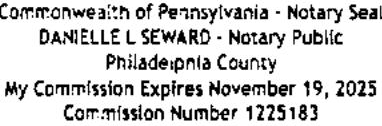

page#19.jpg
page#20.jpg


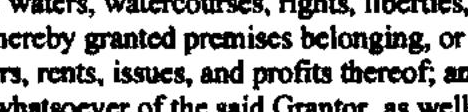

page#21.jpg


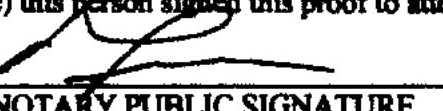

page#22.jpg
page#24.jpg
page#25.jpg


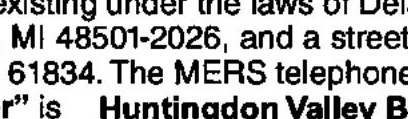

page#26.jpg


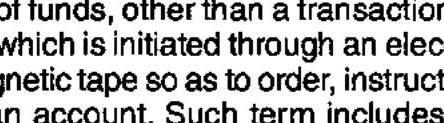

page#27.jpg
page#28.jpg
page#29.jpg


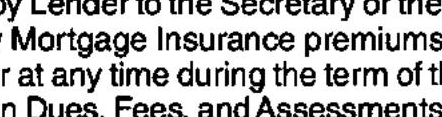

page#30.jpg
page#31.jpg
page#32.jpg
page#33.jpg
page#34.jpg
page#35.jpg
page#36.jpg


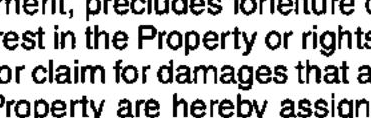

page#37.jpg
page#38.jpg


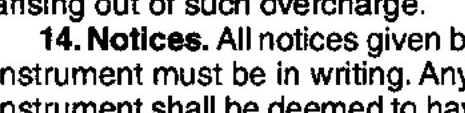

page#39.jpg
page#40.jpg
page#41.jpg
page#42.jpg
page#43.jpg
page#44.jpg
page#45.jpg
page#46.jpg


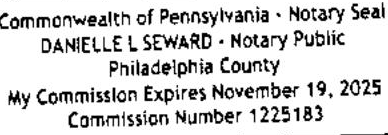

page#66.jpg
page#67.jpg


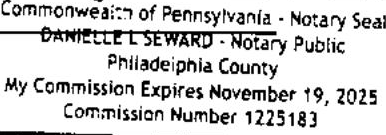

page#70.jpg


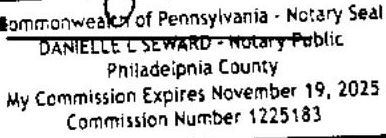

page#71.jpg


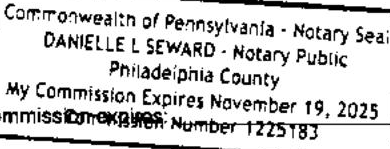

page#103.jpg


In [ ]:
for i in pages:
  print(i)
  FINAL_FUNCTON_DETECT_STAMP(i)

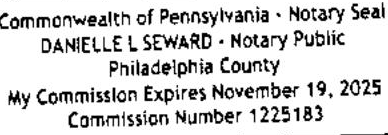

In [ ]:
FINAL_FUNCTON_DETECT_STAMP("page#46.jpg")

In [15]:
!pip install dateparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from PIL import Image
import numpy as np
import datetime
import re
from dateparser import parse

In [17]:
!pip install google-cloud-vision Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import os
import io
import cv2
import numpy as np
from PIL import Image
from base64 import b64decode
from google.cloud import vision
from os import environ
from io import BytesIO

In [19]:
file1 = Image.open('/content/Crop_page#18.jpg_9_1.jpg')

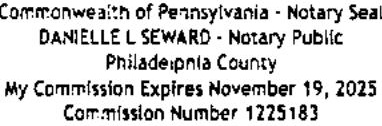

In [20]:
file1

In [145]:
from google.cloud.vision_v1 import types
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file('/content/GOOGLE_OCR.json')
client = vision.ImageAnnotatorClient(credentials=credentials)

In [146]:
def get_text(file, credentials, client):
  imageCV = cv2.cvtColor(np.array(file), cv2.COLOR_RGB2BGR)
  success, encodedImage = cv2.imencode('.png', imageCV)
  content2 = encodedImage.tobytes()
  imageCV2 = vision.Image(content=content2)
  response = client.text_detection(image=imageCV2)
  text = response.text_annotations[0].description
  return text 

In [148]:
# text = get_text(file1, credentials, client)
# print(text)

In [25]:
def get_text_from_image(image):        
    page_text = ""
    with BytesIO() as f:
            image.save(f, format='png')
            f.seek(0)
            ima_jpg = Image.open(f, formats=['png'])
            page_text = pytesseract.image_to_string(ima_jpg, 
                                                    config=r'-l eng --psm 6')
    return page_text

In [33]:
img = Image.open("/content/Crop_page#18.jpg_9_1.jpg")
text = get_text_from_image(img)

In [34]:
import re
from dateutil.parser import parse

def find_date(text):
    regex = r"((19|20)?\d{1,2}\s?[-/]\s?\d{1,2}\s?[-/]\s?(19|20)?\d{2})|"\
        r"((Jan|Feb|Mar|Apr|May|Jun|June|Jul|Aug|Sept|Sep|Oct|Nov|Dec)"\
        r"\s?\d{1,2}\s?[,']?\s?(19|20)?\d{2})|(\d{1,2}\s?[-/]?\s?"\
        r"(Jan|Feb|Mar|Apr|May|Jun|June|Jul|Aug|Sept|Sep|Oct|Nov|Dec)"\
        r"\s?[',-/]?\s?(19|20)?\d{1,2})|"\
        r"((Jan|Feb|Mar|Apr|May|Jun|July|Aug|Sept|Oct|Nov|Dec)\w*\s+\d{1,2},\s+\d{4})"
    pattern = re.compile(regex, flags=re.IGNORECASE)
    matches = list(re.finditer(pattern, text))
    if len(matches)==0:
        return None
    date = matches[0].group(0)
    return parse(date)

In [35]:
date = find_date(text)
date

datetime.datetime(2025, 11, 19, 0, 0)

In [36]:
import datetime

def is_date(obj):
    return isinstance(obj, datetime.datetime)

In [37]:
is_date(date)

True

In [52]:
def FINAL_FUNCTON_DETECT_STAMP(img_path):
  import os
  import cv2
  import numpy as np
  from PIL import Image
  
  DETECT_IMAGE_NAME = []
  fileName = ['9','8','7','6','5','4','3','2','1','0']
  
  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = cv2.bilateralFilter(gray, 11, 17, 17)
  kernel = np.ones((5,5),np.uint8)
  erosion = cv2.erode(gray,kernel,iterations = 2)
  kernel = np.ones((4,4),np.uint8)
  dilation = cv2.dilate(erosion,kernel,iterations = 2)
  edged = cv2.Canny(dilation, 30, 200)
  
  contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  rects = [cv2.boundingRect(cnt) for cnt in contours]
  rects = sorted(rects,key=lambda x:x[1],reverse=True)

  i = -1
  j = 1
  y_old = 5000
  x_old = 5000

  for rect in rects:
      x,y,w,h = rect
      area = w * h
      
      if area > 50000 and area < 70000:
        if (h > 120 and h < 200) and (w > 380 and w < 500):
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
            
            if (y_old - y) > 200:
                i += 1
                y_old = y
            
            if abs(x_old - x) > 300:
                x_old = x
                x,y,w,h = rect
                out = img[y+10:y+h-10,x+10:x+w-10]
                
                # OCR
                cv2.imwrite("Crop_"+str(img_path) + '_' + fileName[i] + '_' + str(j) + '.jpg', out)
                GET_CROP_IMG = "Crop_"+str(img_path) + '_' + fileName[i] + '_' + str(j) + '.jpg'
                file1 = Image.open(GET_CROP_IMG)
                text = get_text_from_image(file1)
                date = find_date(text)
                
                if is_date(date):
                    # create folder if it does not exist
                    if not os.path.exists('stamp detection'):
                        os.mkdir('stamp detection')
                    
                    # save stamp image in folder
                    stamp_img_path = os.path.join('stamp detection', 'stamp_' + GET_CROP_IMG)
                    cv2.imwrite(stamp_img_path, out)
                    DETECT_IMAGE_NAME.append(stamp_img_path)
                    print("Detect Stamp Image Name: ", stamp_img_path)
                    j+=1
                #     # plot cropped image
                    cv2_imshow(out)
                # remove image
                os.remove(GET_CROP_IMG)

  # plot original image
  # cv2_imshow(img)

In [53]:
# detect = []
# for i in pages:
#   img = FINAL_FUNCTON_DETECT_STAMP(i)
#   file1 = Image.open(img)
#   text = get_text(file1, credentials, client)
#   print(text)

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#18.jpg_9_1.jpg


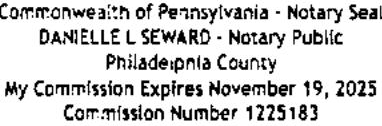

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#46.jpg_9_1.jpg


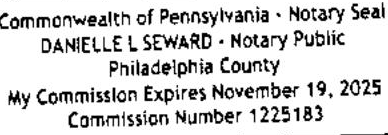

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#67.jpg_9_1.jpg


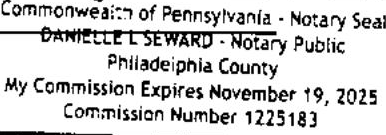

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#70.jpg_9_1.jpg


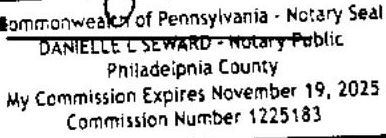

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#71.jpg_9_1.jpg


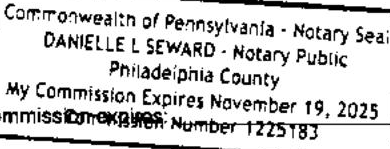

In [54]:
for i in pages:
  FINAL_FUNCTON_DETECT_STAMP(i)

# **MAKE PIPELINE**

In [59]:
!pip install dateparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
!pip install PyPDF4~=1.27.0
!pip install pdf2image~=1.16.0
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt-get install poppler-utils
#!pip install paddleocr
#!pip install paddlepaddle paddleocr
#!pip install Pillow==9.0.0 --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [77]:
import csv
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
from PyPDF4.pdf import BytesIO
import os
import pandas as pd
from tqdm.auto import tqdm
from IPython.display import clear_output 
import io
import pandas as pd


In [133]:
pdf_file = "/content/drive/MyDrive/Annotation Folder/Few_Packages/PDF/217932_PA_PHILADELPHIA.pdf"

In [134]:
def get_images_from_file(filename):
    try:
        return convert_from_path(filename, thread_count=8)
    except:
        return []

In [135]:
images = get_images_from_file(pdf_file)

In [136]:
pages = []
for i, image in tqdm(enumerate(images)):
    pages.append(f'page#{i+1}.jpg')
    image.save(f'page#{i+1}.jpg')

0it [00:00, ?it/s]

In [152]:
def FINAL_FUNCTON_DETECT_STAMP(img_path):
  import os
  import cv2
  import numpy as np
  from PIL import Image
  
  DETECT_IMAGE_NAME = []
  fileName = ['9','8','7','6','5','4','3','2','1','0']
  
  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = cv2.bilateralFilter(gray, 11, 17, 17)
  kernel = np.ones((5,5),np.uint8)
  erosion = cv2.erode(gray,kernel,iterations = 2)
  kernel = np.ones((4,4),np.uint8)
  dilation = cv2.dilate(erosion,kernel,iterations = 2)
  edged = cv2.Canny(dilation, 30, 200)
  
  contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  rects = [cv2.boundingRect(cnt) for cnt in contours]
  rects = sorted(rects,key=lambda x:x[1],reverse=True)

  i = -1
  j = 1
  y_old = 5000
  x_old = 5000

  for rect in rects:
      x,y,w,h = rect
      area = w * h
      
      if area > 50000 and area < 70000:
        if (h > 120 and h < 200) and (w > 380 and w < 500):
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
            
            if (y_old - y) > 200:
                i += 1
                y_old = y
            
            if abs(x_old - x) > 300:
                x_old = x
                x,y,w,h = rect
                out = img[y+10:y+h-10,x+10:x+w-10]
                
                # OCR
                cv2.imwrite("Crop_"+str(img_path) + '_' + fileName[i] + '_' + str(j) + '.jpg', out)
                GET_CROP_IMG = "Crop_"+str(img_path) + '_' + fileName[i] + '_' + str(j) + '.jpg'
                file1 = Image.open(GET_CROP_IMG)
                text = get_text_from_image(file1)
                date = find_date(text)
                
                if is_date(date):
                    DETECT_IMAGE_NAME.append(img_path)
                    # create folder if it does not exist
                    if not os.path.exists('stamp detection'):
                        os.mkdir('stamp detection')
                    
                    # save stamp image in folder
                    stamp_img_path = os.path.join('stamp detection', 'stamp_' + GET_CROP_IMG)
                    cv2.imwrite(stamp_img_path, out)
                    DETECT_IMAGE_NAME.append(stamp_img_path)
                    print("Detect Stamp Image Name: ", stamp_img_path)
                    j+=1
                #     # plot cropped image
                    cv2_imshow(out)
                # remove image
                os.remove(GET_CROP_IMG)

  # plot original image
  # cv2_imshow(img)
  return DETECT_IMAGE_NAME

In [141]:
from PIL import Image
import numpy as np
import datetime
import re
from dateparser import parse

In [142]:
def get_text_from_image(image):        
    page_text = ""
    with BytesIO() as f:
            image.save(f, format='png')
            f.seek(0)
            ima_jpg = Image.open(f, formats=['png'])
            page_text = pytesseract.image_to_string(ima_jpg, 
                                                    config=r'-l eng --psm 6')
    return page_text

In [143]:
import re
from dateutil.parser import parse

def find_date(text):
    regex = r"((19|20)?\d{1,2}\s?[-/]\s?\d{1,2}\s?[-/]\s?(19|20)?\d{2})|"\
        r"((Jan|Feb|Mar|Apr|May|Jun|June|Jul|Aug|Sept|Sep|Oct|Nov|Dec)"\
        r"\s?\d{1,2}\s?[,']?\s?(19|20)?\d{2})|(\d{1,2}\s?[-/]?\s?"\
        r"(Jan|Feb|Mar|Apr|May|Jun|June|Jul|Aug|Sept|Sep|Oct|Nov|Dec)"\
        r"\s?[',-/]?\s?(19|20)?\d{1,2})|"\
        r"((Jan|Feb|Mar|Apr|May|Jun|July|Aug|Sept|Oct|Nov|Dec)\w*\s+\d{1,2},\s+\d{4})"
    pattern = re.compile(regex, flags=re.IGNORECASE)
    matches = list(re.finditer(pattern, text))
    if len(matches)==0:
        return None
    date = matches[0].group(0)
    return parse(date)

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#18.jpg_9_1.jpg


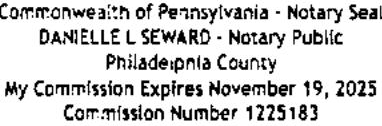

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#46.jpg_9_1.jpg


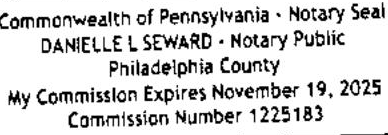

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#67.jpg_9_1.jpg


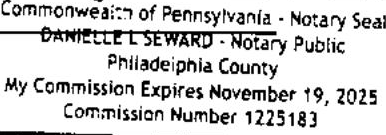

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#70.jpg_9_1.jpg


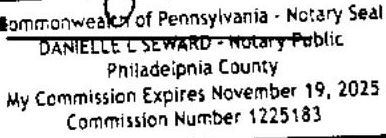

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#71.jpg_9_1.jpg


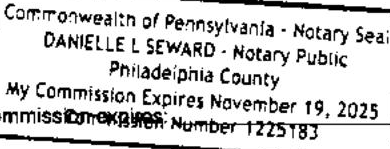

In [144]:
for i in pages:
  FINAL_FUNCTON_DETECT_STAMP(i)

In [150]:
import glob

pdf_files = glob.glob("/content/drive/MyDrive/Annotation Folder/Few_Packages/PDF/*.pdf")

print(pdf_files)


['/content/drive/MyDrive/Annotation Folder/Few_Packages/PDF/217932_PA_PHILADELPHIA.pdf', '/content/drive/MyDrive/Annotation Folder/Few_Packages/PDF/Raheem_SAMPLE_CHECKING.pdf', '/content/drive/MyDrive/Annotation Folder/Few_Packages/PDF/Sample_9_NJ.pdf', '/content/drive/MyDrive/Annotation Folder/Few_Packages/PDF/218248_NJ_CAMDEN.pdf', '/content/drive/MyDrive/Annotation Folder/Few_Packages/PDF/117665_NJ_CAMDEN.pdf', '/content/drive/MyDrive/Annotation Folder/Few_Packages/PDF/218246_NJ_SALEM.pdf', '/content/drive/MyDrive/Annotation Folder/Few_Packages/PDF/218245_NJ_CAMDEN.pdf', '/content/drive/MyDrive/Annotation Folder/Few_Packages/PDF/117664_NJ_CAMDEN.pdf']


In [151]:
pdf_files[0].split("/")[-1]

'217932_PA_PHILADELPHIA.pdf'

0it [00:00, ?it/s]

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#18.jpg_9_1.jpg


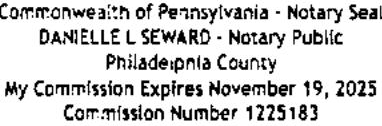

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#46.jpg_9_1.jpg


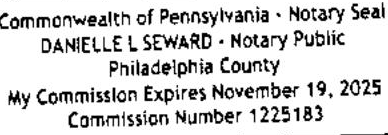

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#67.jpg_9_1.jpg


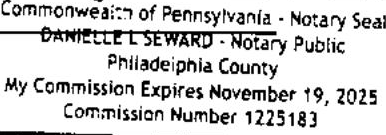

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#70.jpg_9_1.jpg


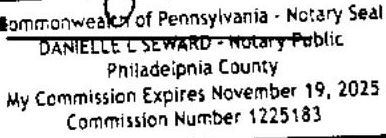

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#71.jpg_9_1.jpg


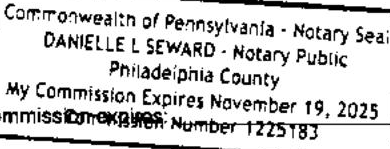

0it [00:00, ?it/s]

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#92.jpg_9_1.jpg


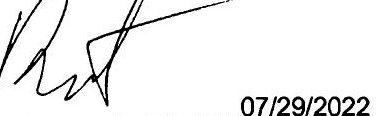

0it [00:00, ?it/s]

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#2.jpg_9_1.jpg


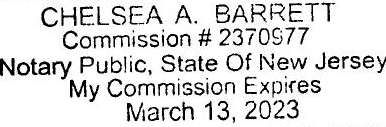

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#30.jpg_9_1.jpg


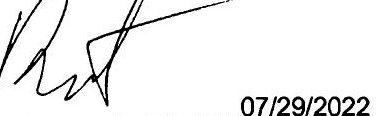

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#65.jpg_9_1.jpg


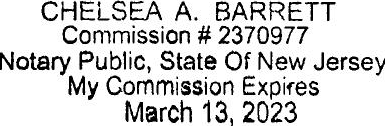

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#67.jpg_9_1.jpg


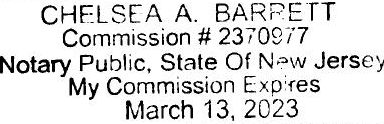

0it [00:00, ?it/s]

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#2.jpg_9_1.jpg


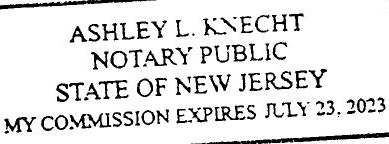

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#59.jpg_9_1.jpg


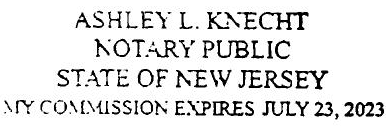

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#60.jpg_9_1.jpg


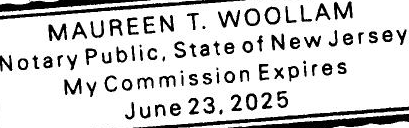

0it [00:00, ?it/s]

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#27.jpg_9_1.jpg


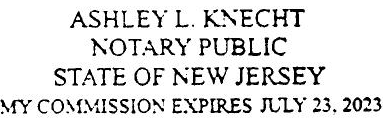

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#49.jpg_9_1.jpg


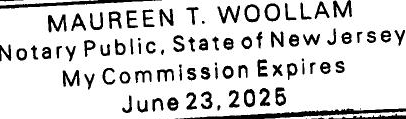

0it [00:00, ?it/s]

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#14.jpg_9_1.jpg


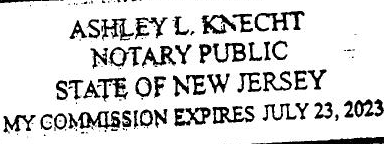

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#18.jpg_9_1.jpg


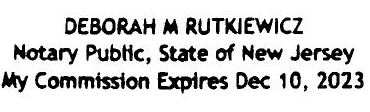

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#54.jpg_9_1.jpg


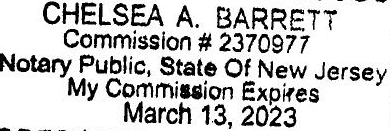

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#55.jpg_9_1.jpg


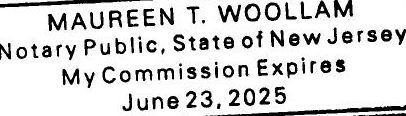

0it [00:00, ?it/s]

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#16.jpg_9_1.jpg


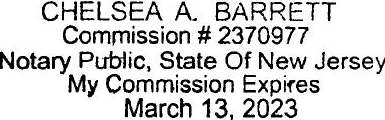

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#34.jpg_9_1.jpg


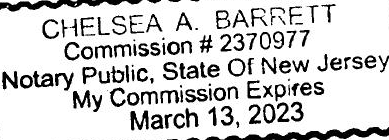

0it [00:00, ?it/s]

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#2.jpg_9_1.jpg


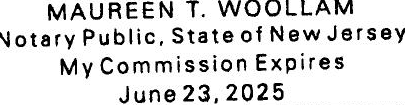

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#17.jpg_9_1.jpg


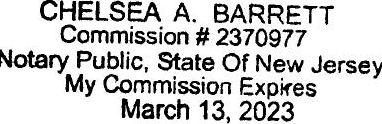

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#65.jpg_9_1.jpg


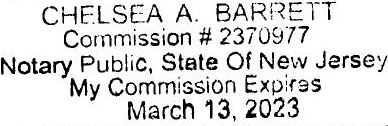

Detect Stamp Image Name:  stamp detection/stamp_Crop_page#71.jpg_9_1.jpg


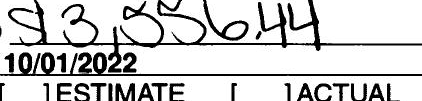

In [153]:
res = []
for i in pdf_files:
  images = get_images_from_file(i)
  pages = []
  for i, image in tqdm(enumerate(images)):
      pages.append(f'page#{i+1}.jpg')
      image.save(f'page#{i+1}.jpg')
  for j in pages:
    res.append(FINAL_FUNCTON_DETECT_STAMP(j))

In [154]:
res

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['page#18.jpg', 'stamp detection/stamp_Crop_page#18.jpg_9_1.jpg'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['page#46.jpg', 'stamp detection/stamp_Crop_page#46.jpg_9_1.jpg'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['page#67.jpg', 'stamp detection/stamp_Crop_page#67.jpg_9_1.jpg'],
 [],
 [],
 ['page#70.jpg', 'stamp detection/stamp_Crop_page#70.jpg_9_1.jpg'],
 ['page#71.jpg', 'stamp detection/stamp_Crop_page#71.jpg_9_1.jpg'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
